In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

# Build DNN model

In [58]:
inputs =Input(shape=(1,))
x = Dense(32,activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

# Polynomial function

In [59]:
def polynomial(x):
    return 7*x*x*x-12*x*x-22*x+7

# Data set

In [60]:
import numpy as np

x_train = np.arange(-20,20,0.2)
y_train = polynomial(x_train)

print(x_train)
print(y_train)

[-2.00000000e+01 -1.98000000e+01 -1.96000000e+01 -1.94000000e+01
 -1.92000000e+01 -1.90000000e+01 -1.88000000e+01 -1.86000000e+01
 -1.84000000e+01 -1.82000000e+01 -1.80000000e+01 -1.78000000e+01
 -1.76000000e+01 -1.74000000e+01 -1.72000000e+01 -1.70000000e+01
 -1.68000000e+01 -1.66000000e+01 -1.64000000e+01 -1.62000000e+01
 -1.60000000e+01 -1.58000000e+01 -1.56000000e+01 -1.54000000e+01
 -1.52000000e+01 -1.50000000e+01 -1.48000000e+01 -1.46000000e+01
 -1.44000000e+01 -1.42000000e+01 -1.40000000e+01 -1.38000000e+01
 -1.36000000e+01 -1.34000000e+01 -1.32000000e+01 -1.30000000e+01
 -1.28000000e+01 -1.26000000e+01 -1.24000000e+01 -1.22000000e+01
 -1.20000000e+01 -1.18000000e+01 -1.16000000e+01 -1.14000000e+01
 -1.12000000e+01 -1.10000000e+01 -1.08000000e+01 -1.06000000e+01
 -1.04000000e+01 -1.02000000e+01 -1.00000000e+01 -9.80000000e+00
 -9.60000000e+00 -9.40000000e+00 -9.20000000e+00 -9.00000000e+00
 -8.80000000e+00 -8.60000000e+00 -8.40000000e+00 -8.20000000e+00
 -8.00000000e+00 -7.80000

# normalize x values

In [61]:
x_train = 2*((x_train-x_train.min()))/(x_train.max()-x_train.min())-1
print(x_train.min())
print(x_train.max())

-1.0
1.0


# Normalize y_train values

In [62]:
y_train = 2*((y_train-y_train.min())/(y_train.max()-y_train.min()))-1
print(y_train.min())
print(y_train.max())

-1.0
1.0


# Split train, val and test data

In [63]:
x_train_data = x_train[:int(len(x_train)*0.90)]
y_train_data = y_train[:int(len(y_train)*0.90)]

x_val = x_train[int(len(x_train)*0.90):int(len(x_train)*0.95)]
y_val = y_train[int(len(y_train)*0.90):int(len(y_train)*0.95)]

x_test = x_train[int(len(x_train)*0.95):]
y_test = y_train[int(len(y_train)*0.95):]


# Compile & Fit the model

In [64]:
from tensorflow.keras.metrics import R2Score
model.compile(optimizer='adam', loss=['mse'], metrics=[R2Score(name="accuracy")])
model_history = model.fit(x_train_data, y_train_data, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0394 - loss: 0.1020 - val_accuracy: -88.4565 - val_loss: 0.3060
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4938 - loss: 0.0429 - val_accuracy: -48.7839 - val_loss: 0.1703
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6960 - loss: 0.0262 - val_accuracy: -16.0873 - val_loss: 0.0584
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7830 - loss: 0.0247 - val_accuracy: -9.8333 - val_loss: 0.0371
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8136 - loss: 0.0190 - val_accuracy: -18.5339 - val_loss: 0.0668
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8483 - loss: 0.0166 - val_accuracy: -27.8874 - val_loss: 0.0988
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8764 - loss: 0.0108 - val_accuracy: -29.5967 - val_loss: 0.1047
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8928 - loss: 0.0098 - val_accuracy: -24.9773 - val_loss

# Plot

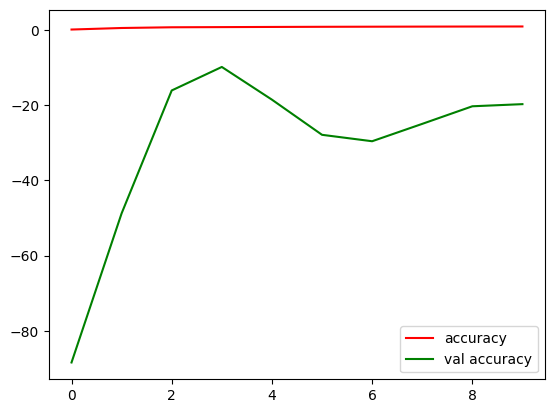

In [65]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], color='red', label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='green', label='val accuracy')
plt.legend()

# Test loss and R2Score

In [66]:
score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test R2Score: ", score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: -37.7901 - loss: 0.2110
Test Loss:  0.21098122000694275
Test R2Score:  -37.790138244628906


# train loss vs val loss

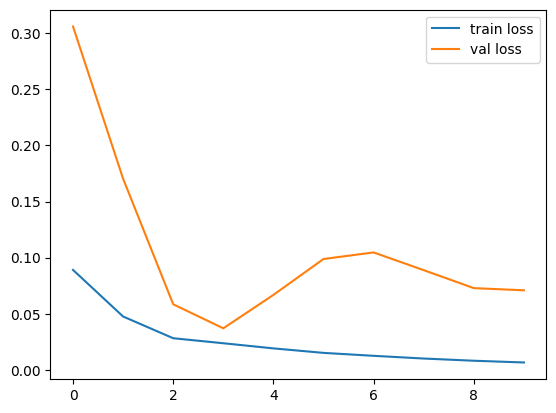

In [67]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()

# Predict

In [69]:
predict_y = model.predict(x_test)

for i in range(10):
  print(np.argmax(y_test[i]),"---------", np.argmax(predict_y[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
0 --------- 0
